In [114]:
# Import required libraries.
import hvplot.pandas
import pandas as pd
from pathlib import Path
import os
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from collections import Counter
import sqlalchemy
import matplotlib.pyplot as plt


## Pull in Tweet data from CSV and use Counter to count tweets per day.

In [2]:
# Pull in Tweets CSV data.
tweets_otly_df = pd.read_csv(Path("Twitter Data/tweetsbyday_otly.csv"))
tweets_ebet_df = pd.read_csv(Path("Twitter Data/tweetsbyday_ebet.csv"))
tweets_abnb_df = pd.read_csv(Path("Twitter Data/tweetsbyday_abnb.csv"))
tweets_lz_df = pd.read_csv(Path("Twitter Data/tweetsbyday_lz.csv"))
tweets_fxlv_df = pd.read_csv(Path("Twitter Data/tweetsbyday_fxlv.csv"))

display(tweets_otly_df.head())
display(tweets_ebet_df.head())
display(tweets_fxlv_df.head())

,Unnamed: 0,date
0,0,2021-08-19
1,1,2021-08-19
2,2,2021-08-19
3,3,2021-08-19
4,4,2021-08-19


,Unnamed: 0,date
0,0,2021-07-14
1,1,2021-07-14
2,2,2021-07-14
3,3,2021-07-14
4,4,2021-07-14


,Unnamed: 0,date
0,0,2021-10-08
1,1,2021-10-08
2,2,2021-10-08
3,3,2021-10-08
4,4,2021-10-08


In [3]:
# Count tweets per day, clean the data for each dataframe.
#OTLY Tweets:
date_count_otly = tweets_otly_df["date"]
date_count_otly = Counter(date_count_otly)
date_dict_otly = dict(date_count_otly)
Tweetsperday_otly = pd.DataFrame(date_dict_otly.items(), columns = ["Date", "TweetCount"])

#EBET Tweets: 
date_count_ebet = tweets_ebet_df["date"]
date_count_ebet = Counter(date_count_ebet)
date_dict_ebet = dict(date_count_ebet)
Tweetsperday_ebet = pd.DataFrame(date_dict_ebet.items(), columns = ["Date", "TweetCount"])

#ABNB Tweets: 
date_count_abnb = tweets_abnb_df["date"]
date_count_abnb = Counter(date_count_abnb)
date_dict_abnb = dict(date_count_abnb)
Tweetsperday_abnb = pd.DataFrame(date_dict_abnb.items(), columns = ["Date", "TweetCount"])

#LegalZoom Tweets: 
date_count_lz = tweets_lz_df["date"]
date_count_lz = Counter(date_count_lz)
date_dict_lz = dict(date_count_lz)
Tweetsperday_lz = pd.DataFrame(date_dict_lz.items(), columns = ["Date", "TweetCount"])

#F45 Tweets: 
date_count_fxlv = tweets_fxlv_df["date"]
date_count_fxlv = Counter(date_count_fxlv)
date_dict_fxlv = dict(date_count_fxlv)
Tweetsperday_fxlv = pd.DataFrame(date_dict_fxlv.items(), columns = ["Date", "TweetCount"])

Tweetsperday_fxlv.head()

,Date,TweetCount
0,2021-10-08,32
1,2021-10-07,34
2,2021-10-06,24
3,2021-10-05,12
4,2021-10-04,35


## Use Alpaca to bring in the OTLY stock data

In [4]:
# Load dotenv
load_dotenv()

True

In [5]:
# Set API keys
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")

# Make sure keys have imported correctly.
display(type(ALPACA_API_KEY))
type(ALPACA_SECRET_KEY)

str

str

In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version="v2")

In [7]:
# Set start and end dates for each stock pull.
#OTLY
start_date_otly = pd.Timestamp("2021-05-20", tz="America/New_York").isoformat()
end_date_otly = pd.Timestamp("2021-08-20", tz="America/New_York").isoformat()

#EBET
start_date_ebet = pd.Timestamp("2021-04-15", tz="America/New_York").isoformat()
end_date_ebet = pd.Timestamp("2021-07-15", tz="America/New_York").isoformat()

#ABNB
start_date_abnb = pd.Timestamp("2020-12-10", tz="America/New_York").isoformat()
end_date_abnb = pd.Timestamp("2021-03-10", tz="America/New_York").isoformat()

#LZ
start_date_lz = pd.Timestamp("2021-06-30", tz="America/New_York").isoformat()
end_date_lz = pd.Timestamp("2021-09-30", tz="America/New_York").isoformat()

#FXLV
start_date_fxlv = pd.Timestamp("2021-07-15", tz="America/New_York").isoformat()
end_date_fxlv = pd.Timestamp("2021-10-15", tz="America/New_York").isoformat()

In [8]:
# Define time frame, and row limit for all barset pulls.
timeframe = "1D"
limit_rows =1000

In [9]:
# Get OTLY closing prices for the month after IPO.
otly_df = alpaca.get_barset(
    "OTLY",
    timeframe,
    start = start_date_otly,
    end = end_date_otly,
    limit = limit_rows
).df

#EBET
ebet_df = alpaca.get_barset(
    "EBET",
    timeframe,
    start = start_date_ebet,
    end = end_date_ebet,
    limit = limit_rows
).df

#ABNB
abnb_df = alpaca.get_barset(
    "ABNB",
    timeframe,
    start = start_date_abnb,
    end = end_date_abnb,
    limit = limit_rows
).df

#LZ
lz_df = alpaca.get_barset(
    "LZ",
    timeframe,
    start = start_date_lz,
    end = end_date_lz,
    limit = limit_rows
).df

#FXLV
fxlv_df = alpaca.get_barset(
    "FXLV",
    timeframe,
    start = start_date_fxlv,
    end = end_date_fxlv,
    limit = limit_rows
).df

# Display sample data
fxlv_df.head()

FXLV                                 
                            open     high    low   close   volume
time                                                             
2021-07-15 00:00:00-04:00  17.00  17.7500  15.50  16.450  9477094
2021-07-16 00:00:00-04:00  17.00  16.6500  15.87  16.110  1758310
2021-07-19 00:00:00-04:00  16.30  16.3100  13.50  13.750  2635101
2021-07-20 00:00:00-04:00  13.71  14.1487  13.60  13.959   988145
2021-07-21 00:00:00-04:00  13.93  15.4100  13.87  14.310   458178

In [10]:
# Reset stock data index so date can be cleaned.
#OTLY
otly_df.reset_index(level=0, inplace=True)

#EBET
ebet_df.reset_index(level=0, inplace=True)

#ABNB
abnb_df.reset_index(level=0, inplace=True)

#LZ
lz_df.reset_index(level=0, inplace=True)

#FXLV
fxlv_df.reset_index(level=0, inplace=True)
fxlv_df.head()

time   FXLV                                 
                              open     high    low   close   volume
0 2021-07-15 00:00:00-04:00  17.00  17.7500  15.50  16.450  9477094
1 2021-07-16 00:00:00-04:00  17.00  16.6500  15.87  16.110  1758310
2 2021-07-19 00:00:00-04:00  16.30  16.3100  13.50  13.750  2635101
3 2021-07-20 00:00:00-04:00  13.71  14.1487  13.60  13.959   988145
4 2021-07-21 00:00:00-04:00  13.93  15.4100  13.87  14.310   458178

In [11]:
# Clean date & setup dataframe with necessary columns
otly_df["time"] = pd.to_datetime(otly_df["time"]).dt.date

# Create new dataframe for relevant columns and use for loop to populate it.
#OTLY
otly_df2 = pd.DataFrame()
for column in otly_df:
    otly_df2["time"] = otly_df["time"]
    otly_df2["close"] = otly_df["OTLY"]["close"]
    otly_df2["volume"] = otly_df["OTLY"]["volume"]
    
#EBET
ebet_df["time"] = pd.to_datetime(ebet_df["time"]).dt.date
ebet_df2 = pd.DataFrame()
for column in ebet_df:
    ebet_df2["time"] = ebet_df["time"]
    ebet_df2["close"] = ebet_df["EBET"]["close"]
    ebet_df2["volume"] = ebet_df["EBET"]["volume"]
    
#ABNB
abnb_df["time"] = pd.to_datetime(abnb_df["time"]).dt.date
abnb_df2 = pd.DataFrame()
for column in abnb_df:
    abnb_df2["time"] = abnb_df["time"]
    abnb_df2["close"] = abnb_df["ABNB"]["close"]
    abnb_df2["volume"] = abnb_df["ABNB"]["volume"]
    
#LZ
lz_df["time"] = pd.to_datetime(lz_df["time"]).dt.date
lz_df2 = pd.DataFrame()
for column in lz_df:
    lz_df2["time"] = lz_df["time"]
    lz_df2["close"] = lz_df["LZ"]["close"]
    lz_df2["volume"] = lz_df["LZ"]["volume"]
    
#FXLV
fxlv_df["time"] = pd.to_datetime(fxlv_df["time"]).dt.date
fxlv_df2 = pd.DataFrame()
for column in fxlv_df:
    fxlv_df2["time"] = fxlv_df["time"]
    fxlv_df2["close"] = fxlv_df["FXLV"]["close"]
    fxlv_df2["volume"] = fxlv_df["FXLV"]["volume"]


In [12]:
#Preview dataframes.
display(otly_df2.head())
display(ebet_df2.head())
display(abnb_df2.head())
display(lz_df2.head())
display(fxlv_df2.head())

,time,close,volume
0,2021-05-20,20.24,42800807
1,2021-05-21,22.39,15512845
2,2021-05-24,20.71,7285437
3,2021-05-25,21.18,4932242
4,2021-05-26,21.63,2446139


,time,close,volume
0,2021-04-15,35.8100,5157994
1,2021-04-16,25.3404,8057471
2,2021-04-19,19.9500,2506828
3,2021-04-20,24.8800,4942497
4,2021-04-21,22.6025,1260785


,time,close,volume
0,2020-12-10,144.1240,70688132
1,2020-12-11,139.2489,26587744
2,2020-12-14,129.9637,16755527
3,2020-12-15,124.6800,10764022
4,2020-12-16,138.2600,18864746


,time,close,volume
0,2021-06-30,37.56,12089333
1,2021-07-01,38.50,3142929
2,2021-07-02,39.01,1140162
3,2021-07-06,38.12,656112
4,2021-07-07,37.05,1127616


,time,close,volume
0,2021-07-15,16.450,9477094
1,2021-07-16,16.110,1758310
2,2021-07-19,13.750,2635101
3,2021-07-20,13.959,988145
4,2021-07-21,14.310,458178


## Use SQL to join dataframes into a single table.

In [13]:
# Create the connection string for your SQLite database
database_connection_string = 'sqlite:///'

# Pass the connection string to the SQLAlchemy create_engine function
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that the database engine was created.
engine

Engine(sqlite:///)

In [14]:
# Create all tweets per day and stock price dataframes in SQL.
#OTLY
Tweetsperday_otly.to_sql(
    "tweets_otly",
    engine,
    index=False,
    if_exists="replace")

otly_df2.to_sql(
    "prices_otly",
    engine,
    index=False,
    if_exists="replace")
#EBET
Tweetsperday_ebet.to_sql(
    "tweets_ebet",
    engine,
    index=False,
    if_exists="replace")

ebet_df2.to_sql(
    "prices_ebet",
    engine,
    index=False,
    if_exists="replace")
#ABNB
Tweetsperday_abnb.to_sql(
    "tweets_abnb",
    engine,
    index=False,
    if_exists="replace")

abnb_df2.to_sql(
    "prices_abnb",
    engine,
    index=False,
    if_exists="replace")
#LZ
Tweetsperday_lz.to_sql(
    "tweets_lz",
    engine,
    index=False,
    if_exists="replace")

lz_df2.to_sql(
    "prices_lz",
    engine,
    index=False,
    if_exists="replace")
#FXLV
Tweetsperday_fxlv.to_sql(
    "tweets_fxlv",
    engine,
    index=False,
    if_exists="replace")

fxlv_df2.to_sql(
    "prices_fxlv",
    engine,
    index=False,
    if_exists="replace")


# Check SQL table names
engine.table_names()

/Users/jacob/opt/anaconda3/envs/pandasdev/lib/python3.7/site-packages/ipykernel_launcher.py:65: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['prices_abnb',
 'prices_ebet',
 'prices_fxlv',
 'prices_lz',
 'prices_otly',
 'tweets_abnb',
 'tweets_ebet',
 'tweets_fxlv',
 'tweets_lz',
 'tweets_otly']

In [15]:
# Create JOIN query to join the OTLY tables on each other
otly_query = """
SELECT tweets_otly.Date, tweets_otly.TweetCount, prices_otly.close, prices_otly.volume
FROM prices_otly
JOIN tweets_otly ON tweets_otly.Date = prices_otly.Time
"""
# Create JOIN query to join the EBET tables on each other
ebet_query = """
SELECT tweets_ebet.Date, tweets_ebet.TweetCount, prices_ebet.close, prices_ebet.volume
FROM prices_ebet
JOIN tweets_ebet ON tweets_ebet.Date = prices_ebet.Time
"""
# Create JOIN query to join the ABNB tables on each other
abnb_query = """
SELECT tweets_abnb.Date, tweets_abnb.TweetCount, prices_abnb.close, prices_abnb.volume
FROM prices_abnb
JOIN tweets_abnb ON tweets_abnb.Date = prices_abnb.Time
"""
# Create JOIN query to join the LZ tables on each other
lz_query = """
SELECT tweets_lz.Date, tweets_lz.TweetCount, prices_lz.close, prices_lz.volume
FROM prices_lz
JOIN tweets_lz ON tweets_lz.Date = prices_lz.Time
"""
# Create JOIN query to join the FXLV tables on each other
fxlv_query = """
SELECT tweets_fxlv.Date, tweets_fxlv.TweetCount, prices_fxlv.close, prices_fxlv.volume
FROM prices_fxlv
JOIN tweets_fxlv ON tweets_fxlv.Date = prices_fxlv.Time
"""

# Run the queries.
otly_joined_df = pd.read_sql_query(otly_query, con=engine)
ebet_joined_df = pd.read_sql_query(ebet_query, con=engine)
abnb_joined_df = pd.read_sql_query(abnb_query, con=engine)
lz_joined_df = pd.read_sql_query(lz_query, con=engine)
fxlv_joined_df = pd.read_sql_query(fxlv_query, con=engine)

# Review the resulting Dataframes
display(otly_joined_df.head())
display(ebet_joined_df.head())
display(abnb_joined_df.head())
display(lz_joined_df.head())
display(fxlv_joined_df.head())

,Date,TweetCount,close,volume
0,2021-08-19,63,15.73,3534728
1,2021-08-18,53,15.16,2714345
2,2021-08-17,91,15.92,6298027
3,2021-08-16,246,16.43,4657371
4,2021-08-13,58,16.85,2704530


,Date,TweetCount,close,volume
0,2021-07-14,7,20.1900,26479
1,2021-07-13,10,20.1200,77332
2,2021-07-12,11,20.3500,10192
3,2021-07-09,13,20.5114,84877
4,2021-07-08,18,20.8200,55043


,Date,TweetCount,close,volume
0,2021-03-09,246,182.90,5843699
1,2021-03-08,233,180.81,4712838
2,2021-03-05,243,179.91,8655859
3,2021-03-04,257,180.23,9426789
4,2021-03-03,276,180.41,10163782


,Date,TweetCount,close,volume
0,2021-09-29,14,26.73,573826
1,2021-09-28,20,26.21,637821
2,2021-09-27,15,27.28,1173730
3,2021-09-24,9,26.23,1267794
4,2021-09-23,14,28.48,666283


,Date,TweetCount,close,volume
0,2021-10-08,32,13.40,143064
1,2021-10-07,34,14.03,238310
2,2021-10-06,24,15.43,208383
3,2021-10-05,12,15.89,208380
4,2021-10-04,35,15.70,201210


## Add daily percent change columns to dataframes.

In [16]:
# Sort the dataframes on the date
otly_joined_df = otly_joined_df.sort_values("Date")
ebet_joined_df = ebet_joined_df.sort_values("Date")
abnb_joined_df = abnb_joined_df.sort_values("Date")
lz_joined_df = lz_joined_df.sort_values("Date")
fxlv_joined_df = fxlv_joined_df.sort_values("Date")

# Create function to create percent change columns for each dataframe.
def pct_change(dataframe):
    dataframe["tweet_pct_chg"] = dataframe["TweetCount"].pct_change()
    dataframe["close_pct_chg"] = dataframe["close"].pct_change()
    dataframe["volume_pct_chg"] = dataframe["volume"].pct_change()

# Pass each dataframe through the function
pct_change(otly_joined_df)
pct_change(ebet_joined_df)
pct_change(abnb_joined_df)
pct_change(lz_joined_df)
pct_change(fxlv_joined_df)

# Set the index to the date for each dataframe.
otly_joined_df = otly_joined_df.set_index("Date")
ebet_joined_df = ebet_joined_df.set_index("Date")
abnb_joined_df = abnb_joined_df.set_index("Date")
lz_joined_df = lz_joined_df.set_index("Date")
fxlv_joined_df = fxlv_joined_df.set_index("Date")


'''# Add tweet count percent change
OTLY_joined_df["tweet_pct_chg"] = OTLY_joined_df["TweetCount"].pct_change()
# Add close price percent change
OTLY_joined_df["close_pct_chg"] = OTLY_joined_df["close"].pct_change()
# Add volume percent change
OTLY_joined_df["vol_pct_chg"] = OTLY_joined_df["volume"].pct_change()
# Set the date as index on the dataframe
OTLY_joined_df = OTLY_joined_df.set_index("Date")
#Preview the dataframe
OTLY_joined_df'''

'# Add tweet count percent change\nOTLY_joined_df["tweet_pct_chg"] = OTLY_joined_df["TweetCount"].pct_change()\n# Add close price percent change\nOTLY_joined_df["close_pct_chg"] = OTLY_joined_df["close"].pct_change()\n# Add volume percent change\nOTLY_joined_df["vol_pct_chg"] = OTLY_joined_df["volume"].pct_change()\n# Set the date as index on the dataframe\nOTLY_joined_df = OTLY_joined_df.set_index("Date")\n#Preview the dataframe\nOTLY_joined_df'

In [17]:
# Preview all dataframes
display(otly_joined_df.head())
display(ebet_joined_df.head())
display(abnb_joined_df.head())
display(lz_joined_df.head())
display(fxlv_joined_df.head())

,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
Date,,,,,,
2021-05-20,480,20.24,42800807,NaN,NaN,NaN
2021-05-21,274,22.39,15512845,-0.429167,0.106225,-0.637557
2021-05-24,57,20.71,7285437,-0.791971,-0.075033,-0.530361
2021-05-25,40,21.18,4932242,-0.298246,0.022694,-0.323000
2021-05-26,49,21.63,2446139,0.225000,0.021246,-0.504051


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
Date,,,,,,
2021-04-15,84,35.8100,5157994,NaN,NaN,NaN
2021-04-16,42,25.3404,8057471,-0.500000,-0.292365,0.562133
2021-04-19,12,19.9500,2506828,-0.714286,-0.212720,-0.688882
2021-04-20,54,24.8800,4942497,3.500000,0.247118,0.971614
2021-04-21,25,22.6025,1260785,-0.537037,-0.091539,-0.744909


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
Date,,,,,,
2020-12-10,5963,144.1240,70688132,NaN,NaN,NaN
2020-12-11,1820,139.2489,26587744,-0.694785,-0.033826,-0.623873
2020-12-14,824,129.9637,16755527,-0.547253,-0.066681,-0.369803
2020-12-15,710,124.6800,10764022,-0.138350,-0.040655,-0.357584
2020-12-16,827,138.2600,18864746,0.164789,0.108919,0.752574


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
Date,,,,,,
2021-06-30,294,37.56,12089333,NaN,NaN,NaN
2021-07-01,97,38.50,3142929,-0.670068,0.025027,-0.740025
2021-07-02,24,39.01,1140162,-0.752577,0.013247,-0.637229
2021-07-06,18,38.12,656112,-0.250000,-0.022815,-0.424545
2021-07-07,22,37.05,1127616,0.222222,-0.028069,0.718633


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
Date,,,,,,
2021-07-15,157,16.450,9477094,NaN,NaN,NaN
2021-07-16,25,16.110,1758310,-0.840764,-0.020669,-0.814467
2021-07-19,21,13.750,2635101,-0.160000,-0.146493,0.498656
2021-07-20,11,13.959,988145,-0.476190,0.015200,-0.625007
2021-07-21,7,14.310,458178,-0.363636,0.025145,-0.536325


## Create charts and analysis

In [18]:
# Create pct change overlay charts
#OTLY
otly_tweet_chart = otly_joined_df["tweet_pct_chg"].hvplot(rot=90)
otly_close_chart = otly_joined_df["close_pct_chg"].hvplot(rot=90)
otly_vol_chart = otly_joined_df["volume_pct_chg"].hvplot(rot=90)

otly_overlay = otly_tweet_chart * otly_close_chart * otly_vol_chart
#EBET
ebet_tweet_chart = ebet_joined_df["tweet_pct_chg"].hvplot(rot=90)
ebet_close_chart = ebet_joined_df["close_pct_chg"].hvplot(rot=90)
ebet_vol_chart = ebet_joined_df["volume_pct_chg"].hvplot(rot=90)

ebet_overlay = ebet_tweet_chart * ebet_close_chart * ebet_vol_chart
#ABNB
abnb_tweet_chart = abnb_joined_df["tweet_pct_chg"].hvplot(rot=90)
abnb_close_chart = abnb_joined_df["close_pct_chg"].hvplot(rot=90)
abnb_vol_chart = abnb_joined_df["volume_pct_chg"].hvplot(rot=90)

abnb_overlay = abnb_tweet_chart * abnb_close_chart * abnb_vol_chart
#LZ
lz_tweet_chart = lz_joined_df["tweet_pct_chg"].hvplot(rot=90)
lz_close_chart = lz_joined_df["close_pct_chg"].hvplot(rot=90)
lz_vol_chart = lz_joined_df["volume_pct_chg"].hvplot(rot=90)

lz_overlay = lz_tweet_chart * lz_close_chart * lz_vol_chart
#FXLV
fxlv_tweet_chart = fxlv_joined_df["tweet_pct_chg"].hvplot(rot=90)
fxlv_close_chart = fxlv_joined_df["close_pct_chg"].hvplot(rot=90)
fxlv_vol_chart = fxlv_joined_df["volume_pct_chg"].hvplot(rot=90)

fxlv_overlay = fxlv_tweet_chart * fxlv_close_chart * fxlv_vol_chart

# Display all pct change charts
display(otly_overlay.opts(
    ylabel="% Change",
    title="OTLY Percent Change Overlay - Tweets, Close Price & Volume"))
display(ebet_overlay.opts(
    ylabel="% Change",
    title="Esports Technologies Percent Change Overlay - Tweets, Close Price & Volume"))
display(abnb_overlay.opts(
    ylabel="% Change",
    title="ABNB Percent Change Overlay - Tweets, Close Price & Volume"))
display(lz_overlay.opts(
    ylabel="% Change",
    title="LegalZoom Percent Change Overlay - Tweets, Close Price & Volume"))
display(fxlv_overlay.opts(
    ylabel="% Change",
    title="F45 Fitness Percent Change Overlay - Tweets, Close Price & Volume"))

:Overlay
   .Curve.Tweet_pct_chg  :Curve   [Date]   (tweet_pct_chg)
   .Curve.Close_pct_chg  :Curve   [Date]   (close_pct_chg)
   .Curve.Volume_pct_chg :Curve   [Date]   (volume_pct_chg)

:Overlay
   .Curve.Tweet_pct_chg  :Curve   [Date]   (tweet_pct_chg)
   .Curve.Close_pct_chg  :Curve   [Date]   (close_pct_chg)
   .Curve.Volume_pct_chg :Curve   [Date]   (volume_pct_chg)

:Overlay
   .Curve.Tweet_pct_chg  :Curve   [Date]   (tweet_pct_chg)
   .Curve.Close_pct_chg  :Curve   [Date]   (close_pct_chg)
   .Curve.Volume_pct_chg :Curve   [Date]   (volume_pct_chg)

:Overlay
   .Curve.Tweet_pct_chg  :Curve   [Date]   (tweet_pct_chg)
   .Curve.Close_pct_chg  :Curve   [Date]   (close_pct_chg)
   .Curve.Volume_pct_chg :Curve   [Date]   (volume_pct_chg)

:Overlay
   .Curve.Tweet_pct_chg  :Curve   [Date]   (tweet_pct_chg)
   .Curve.Close_pct_chg  :Curve   [Date]   (close_pct_chg)
   .Curve.Volume_pct_chg :Curve   [Date]   (volume_pct_chg)

In [19]:
# Create correlation tables.
display(otly_joined_df.corr())
display(ebet_joined_df.corr())
display(abnb_joined_df.corr())
display(lz_joined_df.corr())
display(fxlv_joined_df.corr())

,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
TweetCount,1.000000,0.027475,0.842613,0.586306,0.130485,0.308639
close,0.027475,1.000000,-0.046213,-0.031703,0.231822,-0.028003
volume,0.842613,-0.046213,1.000000,0.244726,0.138327,0.179161
tweet_pct_chg,0.586306,-0.031703,0.244726,1.000000,-0.041651,0.661074
close_pct_chg,0.130485,0.231822,0.138327,-0.041651,1.000000,-0.100843
volume_pct_chg,0.308639,-0.028003,0.179161,0.661074,-0.100843,1.000000


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
TweetCount,1.000000,0.630273,0.485379,0.738778,0.057089,-0.045091
close,0.630273,1.000000,0.633288,0.341233,0.181884,0.057879
volume,0.485379,0.633288,1.000000,0.090495,-0.297647,0.048911
tweet_pct_chg,0.738778,0.341233,0.090495,1.000000,0.454132,0.000410
close_pct_chg,0.057089,0.181884,-0.297647,0.454132,1.000000,0.235974
volume_pct_chg,-0.045091,0.057879,0.048911,0.000410,0.235974,1.000000


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
TweetCount,1.000000,-0.279203,0.953634,0.047546,0.159341,0.091736
close,-0.279203,1.000000,-0.303462,0.138192,0.137322,0.029145
volume,0.953634,-0.303462,1.000000,0.011839,0.209483,0.178169
tweet_pct_chg,0.047546,0.138192,0.011839,1.000000,0.315153,0.716388
close_pct_chg,0.159341,0.137322,0.209483,0.315153,1.000000,0.238884
volume_pct_chg,0.091736,0.029145,0.178169,0.716388,0.238884,1.000000


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
TweetCount,1.000000,0.209390,0.878511,0.466579,0.073172,-0.073746
close,0.209390,1.000000,0.022200,0.129188,0.366046,0.045007
volume,0.878511,0.022200,1.000000,-0.150829,-0.081630,0.070751
tweet_pct_chg,0.466579,0.129188,-0.150829,1.000000,0.196421,-0.017920
close_pct_chg,0.073172,0.366046,-0.081630,0.196421,1.000000,0.022956
volume_pct_chg,-0.073746,0.045007,0.070751,-0.017920,0.022956,1.000000


,TweetCount,close,volume,tweet_pct_chg,close_pct_chg,volume_pct_chg
TweetCount,1.000000,0.266564,0.882637,0.380787,-0.097255,0.113261
close,0.266564,1.000000,0.220736,0.083427,0.377342,0.082680
volume,0.882637,0.220736,1.000000,-0.109874,-0.330132,0.149878
tweet_pct_chg,0.380787,0.083427,-0.109874,1.000000,0.040489,0.262717
close_pct_chg,-0.097255,0.377342,-0.330132,0.040489,1.000000,0.090973
volume_pct_chg,0.113261,0.082680,0.149878,0.262717,0.090973,1.000000


<AxesSubplot:label='398fb1f8-be5f-471a-8c09-46eeecff7dbf'>

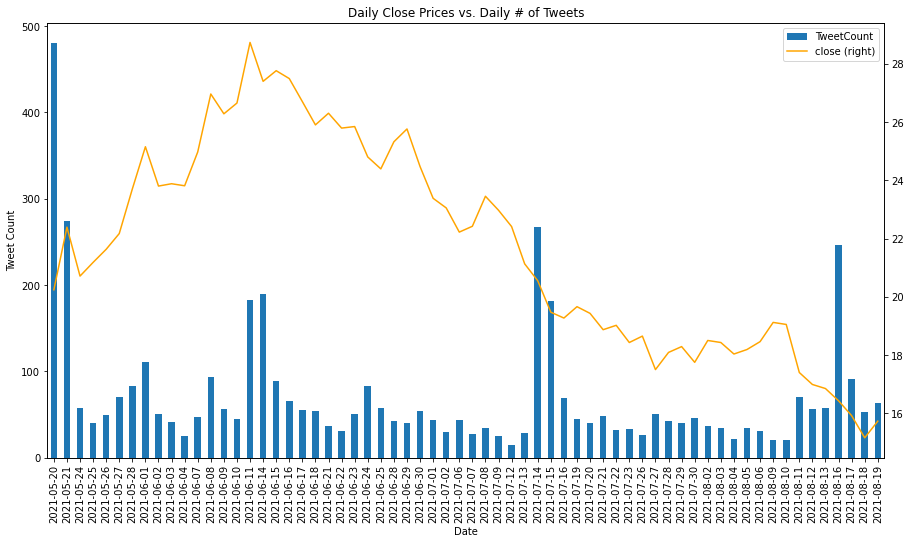

In [88]:
# Plot with multiple y axis.
plt.figure(figsize=(15,8))
legend = ["Tweet Count","Close Price $"]
otly_joined_df["TweetCount"].plot(kind="bar", title="Daily Close Prices vs. Daily # of Tweets", rot=90, legend=legend, ylabel="Tweet Count")
otly_joined_df["close"].plot(secondary_y=True, color="orange", rot=90, legend=legend)


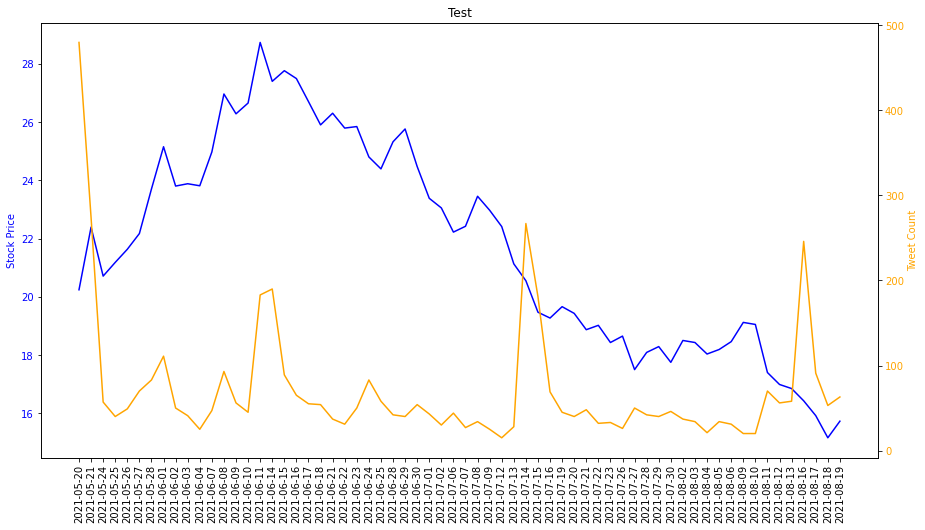

In [105]:
fig, ax1 = plt.subplots(figsize=(15,8))

color1 = "blue"
#ax1.plot(otly_joined_df["close"], color=color1)
ax1.plot(otly_joined_df["close"], color=color1)
ax1.set_ylabel("Stock Price", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.set_title("Test")
plt.xticks(rotation=90)
plt.figsize=(20,8)

ax2 = ax1.twinx()

color2 = "orange"
ax2.plot(otly_joined_df["TweetCount"], color=color2)
ax2.set_ylabel("Tweet Count", color=color2)
ax2.tick_params(axis="y", labelcolor=color2);

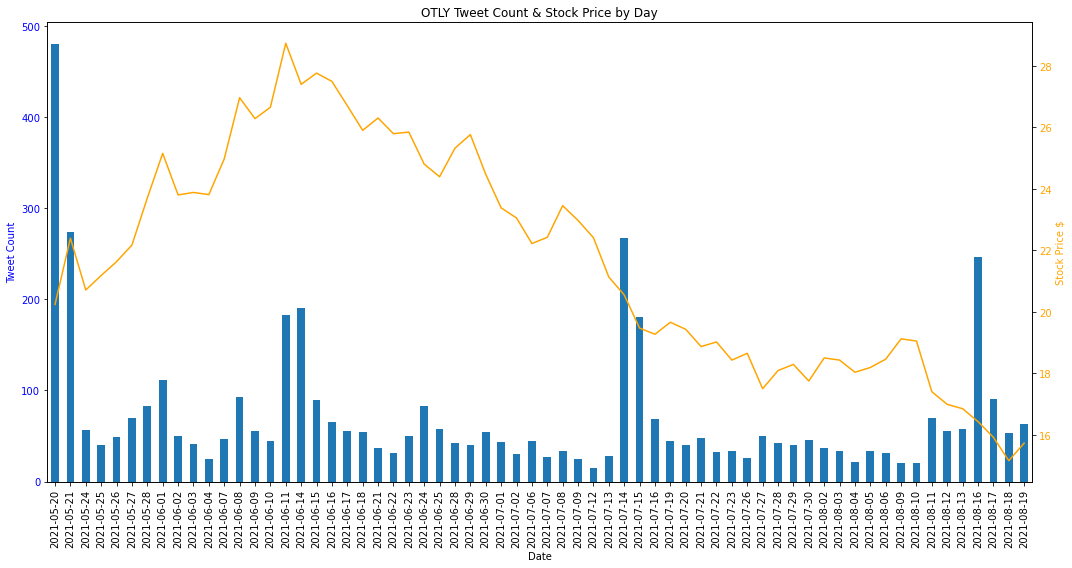

In [118]:
# Create OTLY chart highlighting tweets per day and the closing stock price each day.
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
color1="blue"
color2="orange"

ax = otly_joined_df["TweetCount"].plot(kind="bar")
ax.set_ylabel("Tweet Count", color=color1)
ax.tick_params(axis="y", labelcolor=color1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         otly_joined_df["close"].values,
         linestyle="-",
        color=color2)
ax2.set_ylabel("Stock Price $", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_title("OTLY Tweet Count & Stock Price by Day")

plt.show()
         

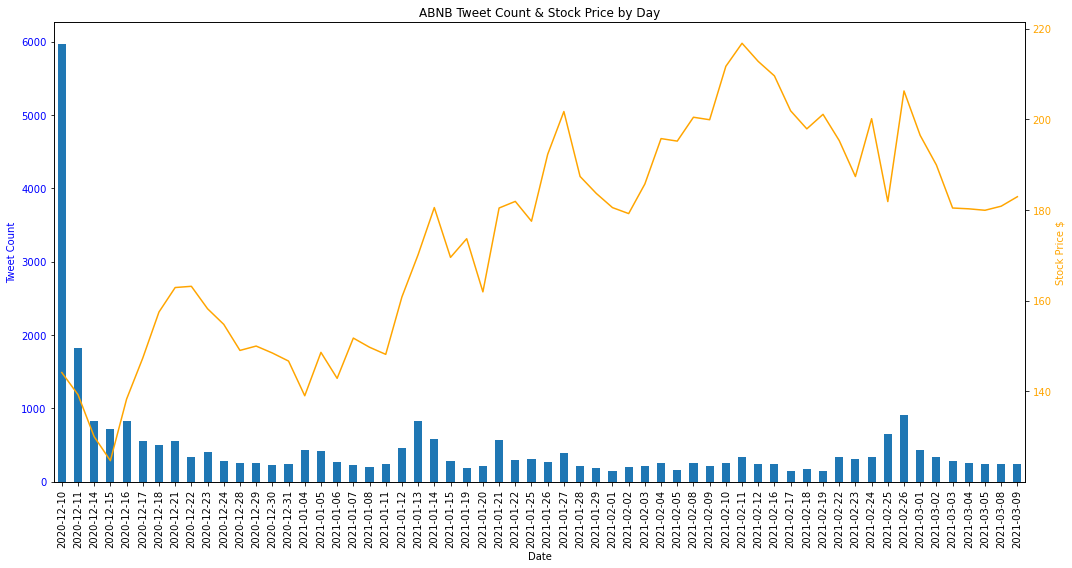

In [120]:
# Create ABNB chart highlighting tweets per day and the closing stock price each day.
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
color1="blue"
color2="orange"

ax = abnb_joined_df["TweetCount"].plot(kind="bar")
ax.set_ylabel("Tweet Count", color=color1)
ax.tick_params(axis="y", labelcolor=color1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         abnb_joined_df["close"].values,
         linestyle="-",
        color=color2)
ax2.set_ylabel("Stock Price $", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_title("ABNB Tweet Count & Stock Price by Day")

plt.show()

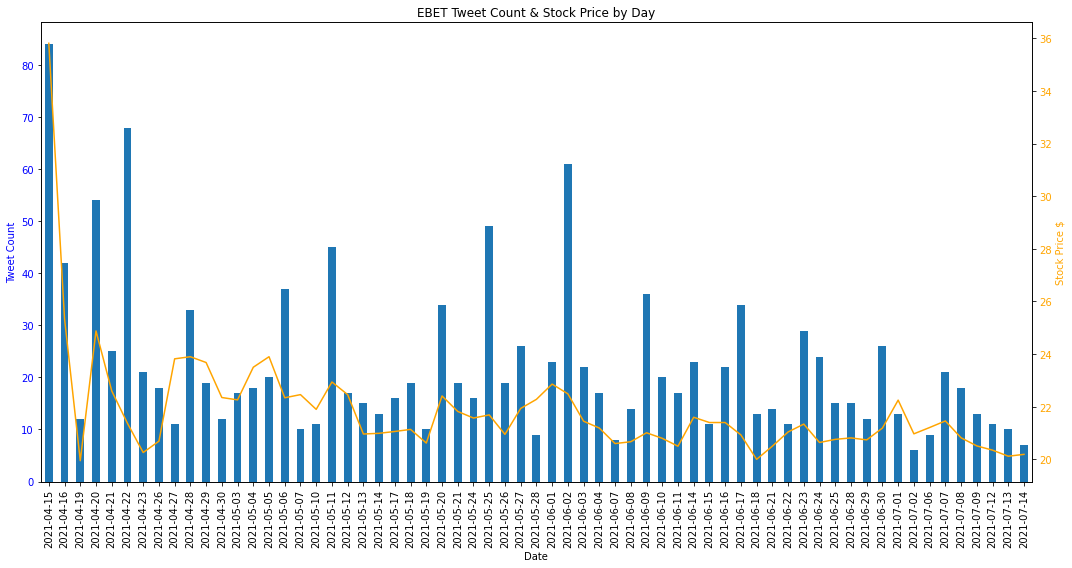

In [121]:
# Create EBET chart highlighting tweets per day and the closing stock price each day.
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
color1="blue"
color2="orange"

ax = ebet_joined_df["TweetCount"].plot(kind="bar")
ax.set_ylabel("Tweet Count", color=color1)
ax.tick_params(axis="y", labelcolor=color1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         ebet_joined_df["close"].values,
         linestyle="-",
        color=color2)
ax2.set_ylabel("Stock Price $", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_title("EBET Tweet Count & Stock Price by Day")

plt.show()

In [126]:
# Cumulative return plot test.
otly_cumulative_return = (1 + otly_joined_df["close_pct_chg"]).cumprod() - 1



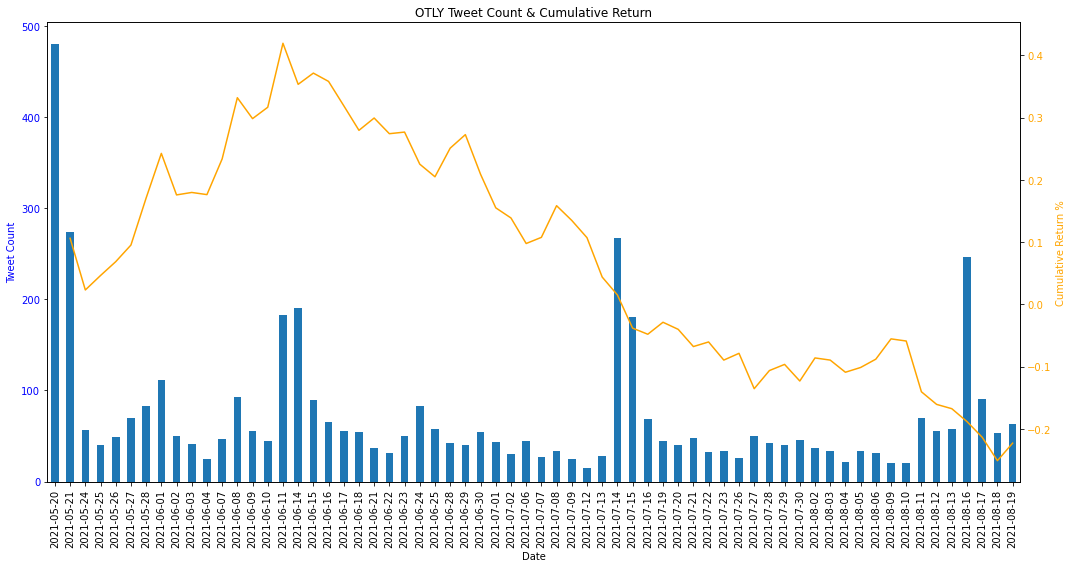

In [129]:
# Create OTLY chart highlighting tweets per day and the cumulative return.
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
color1="blue"
color2="orange"

ax = otly_joined_df["TweetCount"].plot(kind="bar")
ax.set_ylabel("Tweet Count", color=color1)
ax.tick_params(axis="y", labelcolor=color1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         otly_cumulative_return.values,
         linestyle="-",
        color=color2)
ax2.set_ylabel("Cumulative Return %", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_title("OTLY Tweet Count & Cumulative Return")

plt.show()

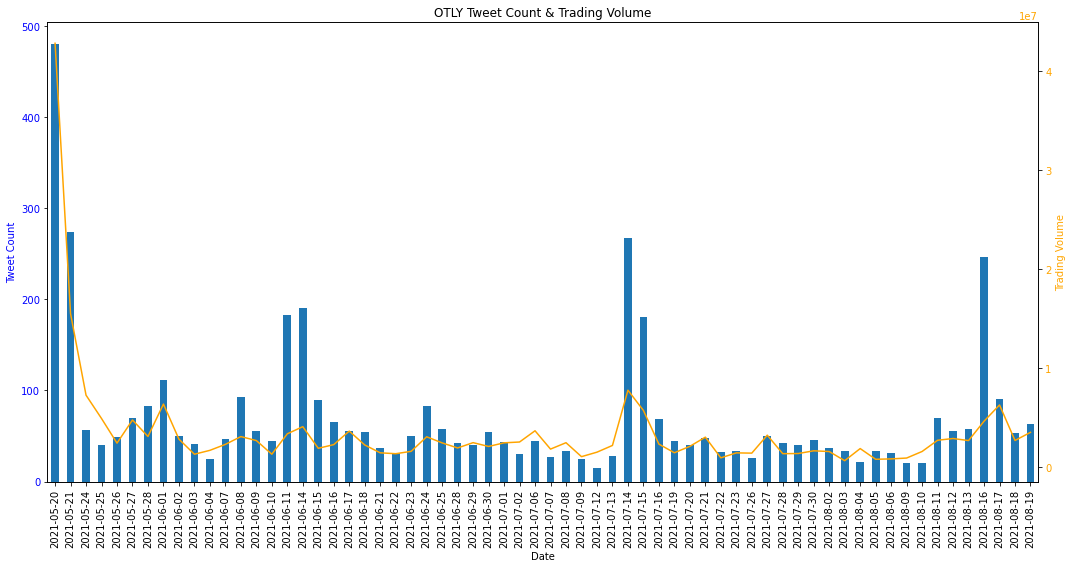

In [130]:
# Create OTLY chart highlighting tweets per day and the volume.
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
color1="blue"
color2="orange"

ax = otly_joined_df["TweetCount"].plot(kind="bar")
ax.set_ylabel("Tweet Count", color=color1)
ax.tick_params(axis="y", labelcolor=color1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         otly_joined_df["volume"].values,
         linestyle="-",
        color=color2)
ax2.set_ylabel("Trading Volume", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_title("OTLY Tweet Count & Trading Volume")

plt.show()